# Classificação das cidades pelo potencial

In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

def Salva_DB(Caminho,Filename,Arquivo):
    open_file = open(f'{Caminho}/{Filename}', "wb")
    pickle.dump(Arquivo, open_file)
    open_file.close()

def Abre_DB(Caminho,Filename):
    with open(f'{Caminho}/{Filename}','rb') as f:
        DB = pickle.load(f)
    return DB

In [2]:
import os
out = os.path.basename('C:/Users/guga_/Desafio Geofusion/Dados')


X_train = pd.DataFrame(Abre_DB(f'{out}/Treino','X_train_potencial.pkl'))
y_train = pd.DataFrame(Abre_DB(f'{out}/Treino','y_train_potencial.pkl'))
X_Test = pd.DataFrame(Abre_DB(f'{out}/Teste','X_test_potencial.pkl'))
y_Test = pd.DataFrame(Abre_DB(f'{out}/Teste','y_test_potencial.pkl'))

print('X_train',X_train.shape)  

print('y_train',y_train.shape) 

print('X_Test',X_Test.shape) 

print('y_Test',y_Test.shape)   



X_train (136, 19)
y_train (136, 1)
X_Test (24, 19)
y_Test (24, 1)


In [3]:
previsores = pd.DataFrame()

## Abordagem Naive Bayes

In [4]:
from sklearn.naive_bayes import GaussianNB

naive_risk = GaussianNB()
naive_risk.fit(X_train,y_train.values.ravel())

previsores['potencial_NB']=(naive_risk.predict(X_Test))

In [5]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_Test,previsores['potencial_NB'])
print(classification_report(y_Test,previsores['potencial_NB']))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.58      0.88      0.70         8
           2       0.12      0.17      0.14         6

    accuracy                           0.50        24
   macro avg       0.57      0.48      0.47        24
weighted avg       0.64      0.50      0.51        24



# Abordagem Arvore de Decisão

In [6]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion='entropy')
DecisionTree.fit(X_train,y_train)
#DecisionTree.feature_importances_

DecisionTreeClassifier(criterion='entropy')

[0 1 2]


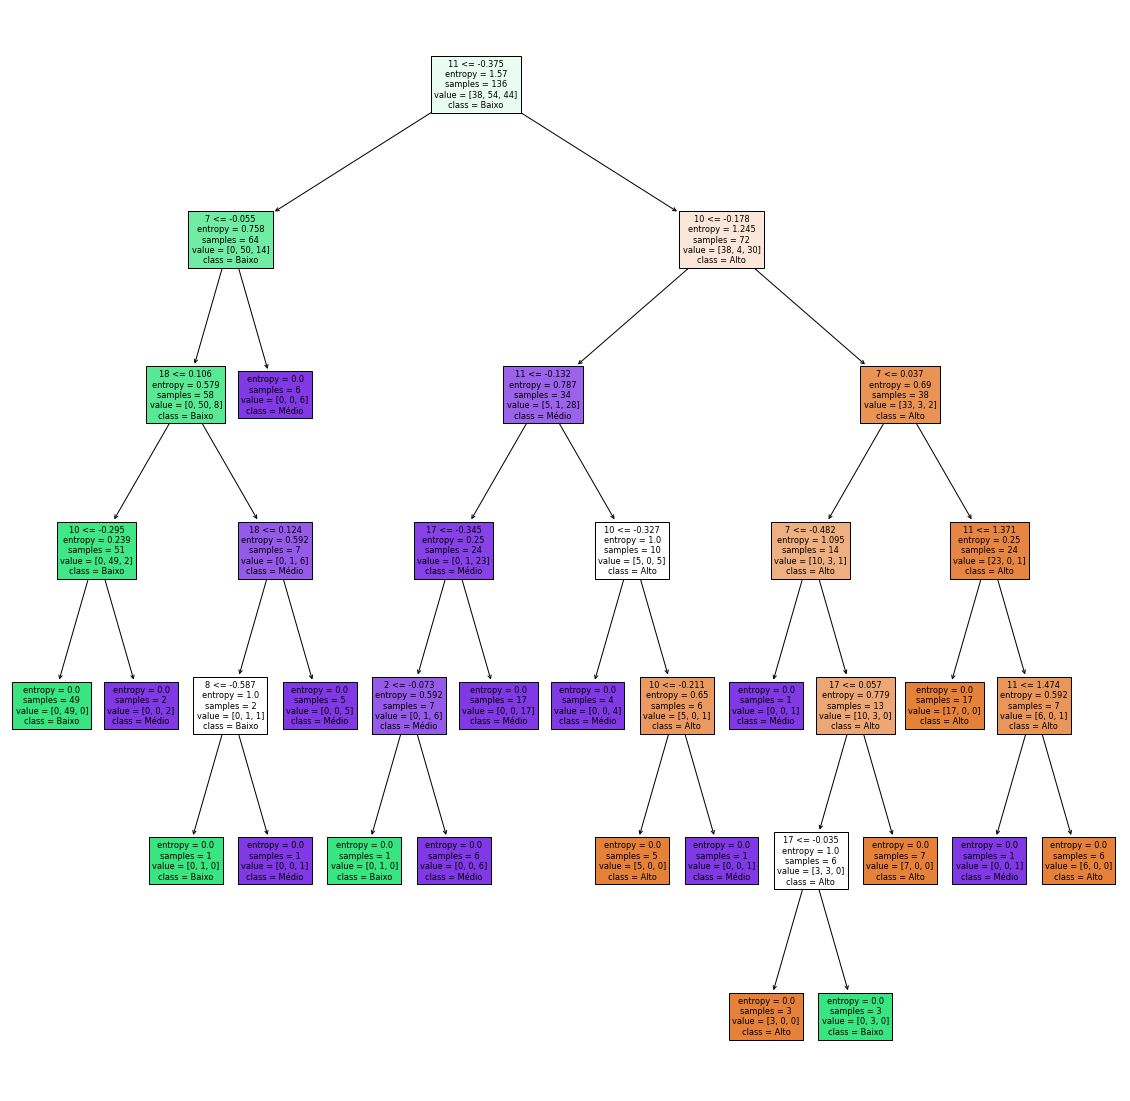

In [7]:
from sklearn import tree
classes = X_train.columns
print(DecisionTree.classes_)
fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(20,20))
tree.plot_tree(DecisionTree, feature_names=classes,class_names=['Alto', 'Baixo','Médio'],filled=True);

In [8]:
previsores['potencial_DT']=(DecisionTree.predict(np.array(X_Test.values)));


In [9]:

from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_Test,previsores['potencial_DT'])
print(classification_report(y_Test,previsores['potencial_DT']))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.89      1.00      0.94         8
           2       0.62      0.83      0.71         6

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.87      0.83      0.84        24



# Abordagem Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=4,criterion='entropy', random_state=0)
RF.fit(X_train,y_train.values.ravel());
previsores['potencial_RF']=(RF.predict(np.array(X_Test)))

In [11]:
'''for i in range(1,80):
    RF = RandomForestClassifier(n_estimators=i,criterion='entropy', random_state=0)
    RF.fit(X_train,y_train.values.ravel());
    previsores['potencial_RF']=(RF.predict(np.array(X_Test)))
    print(i,accuracy_score(y_Test,previsores['potencial_RF']))'''
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_Test,previsores['potencial_RF'])
print(classification_report(y_Test,previsores['potencial_RF']))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00         8
           2       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.95      0.97      0.96        24
weighted avg       0.96      0.96      0.96        24



# Abordagem KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
knn.fit(X_train,y_train.values.ravel())
previsores['potencial_KNN']=knn.predict(X_Test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report,max_error,mean_absolute_error
max_error(y_Test,previsores['potencial_RF'])
accuracy_score(y_Test,previsores['potencial_RF'])
print(classification_report(y_Test,previsores['potencial_KNN']))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.73      1.00      0.84         8
           2       0.75      0.50      0.60         6

    accuracy                           0.83        24
   macro avg       0.83      0.80      0.80        24
weighted avg       0.85      0.83      0.83        24



# Abordagem SVM

In [15]:
from sklearn.svm import SVC

In [17]:
svm = SVC(kernel='linear', random_state=1,C=2.0)
svm.fit(X_train,y_train.values.ravel())


SVC(C=2.0, kernel='linear', random_state=1)

In [18]:
previsores['potencial_SVM']= svm.predict(X_Test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_Test,previsores['potencial_SVM']))
print(classification_report(y_Test,previsores['potencial_SVM']))

0.7916666666666666
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.73      1.00      0.84         8
           2       0.60      0.50      0.55         6

    accuracy                           0.79        24
   macro avg       0.78      0.77      0.76        24
weighted avg       0.81      0.79      0.79        24



In [20]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
clf = SGDClassifier(max_iter=100, tol=1e-3)
clf.fit(X_train,y_train.values.ravel())


previsores['potencial_SGDC']= clf.predict(X_Test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_Test,previsores['potencial_SGDC'])
print(classification_report(y_Test,previsores['potencial_SGDC']))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.64      0.88      0.74         8
           2       0.33      0.17      0.22         6

    accuracy                           0.71        24
   macro avg       0.62      0.65      0.62        24
weighted avg       0.67      0.71      0.68        24



# Salvar o modelo com maior previsão

In [22]:
filename = 'Random_Forest_model.sav'
pickle.dump(RF, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_Test, y_Test)
print(result)

0.9583333333333334
